<a href="https://colab.research.google.com/github/eduion/hw/blob/main/hill_climbing/hill_climbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

最佳解： [0, 1, 0, 1, 0, 0, 1]
最佳解的profits： 1735
最佳解的weights： 169


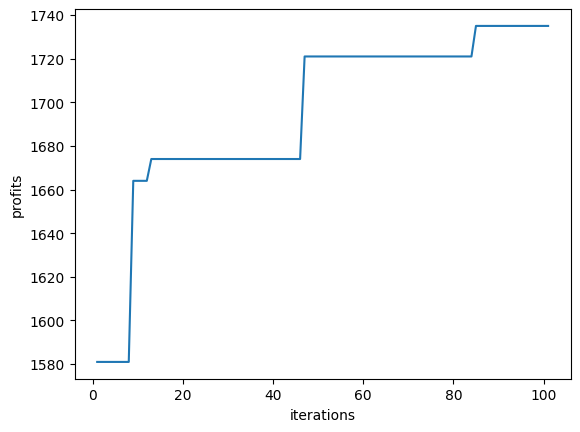

In [111]:
import random
import matplotlib.pyplot as plt
#背包資訊
weights = [41, 50, 49, 59, 55, 57, 60]
profits = [442, 525, 511, 593, 546, 564, 617]
max_weight = 170
record_profit = []
def evaluate(solution): #當前的結果計算weight,profit
  total_weight = 0
  total_profit = 0
  for i in range(len(solution)):
    if solution[i] == 1:
      total_weight = total_weight + weights[i]
      total_profit = total_profit + profits[i]
  return total_profit,total_weight

def generate_neighbour(neighbour): #隨機增加一個物品或刪除一個物品
  index = random.randint(0,len(neighbour) - 1)
  if neighbour[index] == 0:
    neighbour[index] = 1
  else:
    neighbour[index] = 0
  return index,neighbour

def hill_climbing(max_iterations):
  while True: #隨機生成的初始解不超過限制重量
    current_solution = [random.randint(0,1) for i in range(len(weights))] #隨機生成初始解
    current_profit,current_weight = evaluate(current_solution)
    if current_weight<=max_weight:
      record_profit.append(current_profit)
      break
  iterations = 0
  neighbour =  current_solution.copy() #複製一個array用來比較
  while iterations < max_iterations:
    while True:
      index,neighbour = generate_neighbour(neighbour) #index紀錄剛剛改了哪個位置
      neighbour_profit,neighbour_weight = evaluate(neighbour)
      if neighbour_weight<=max_weight: #修改後的重量不超過限制重量
        break
      else: #超過限制重量所以改回來
        if neighbour[index]==0:
          neighbour[index] = 1
        else:
          neighbour[index] = 0
    if neighbour_profit > current_profit:
      record_profit.append(neighbour_profit) #紀錄最好的profit
      current_solution = neighbour.copy() #紀錄最好的結果
      current_profit = neighbour_profit
      current_weight = neighbour_weight
    else:
      record_profit.append(current_profit)
    iterations = iterations + 1
  return current_solution,current_profit,current_weight

max_iterations = 100
solution,profit,weight = hill_climbing(max_iterations)
print("最佳解：", solution)
print("最佳解的profits：", profit)
print("最佳解的weights：", weight)
plt.plot(range(1,len(record_profit)+1),record_profit)
plt.xlabel("iterations")
plt.ylabel('profits')
plt.show()